In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [151]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [3]:
df.shape

(301, 9)

In [4]:
for feature in ["Seller_Type","Seller_Type","Owner"]:
    print(df[feature].unique())

['Dealer' 'Individual']
['Dealer' 'Individual']
[0 1 3]


In [5]:
## check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
## display discriptive statistics
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_dataset["Current_year"]=2020
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [11]:
final_dataset["No_year"]=final_dataset["Current_year"]-final_dataset["Year"]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
final_dataset.drop(["Current_year","Year"], axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


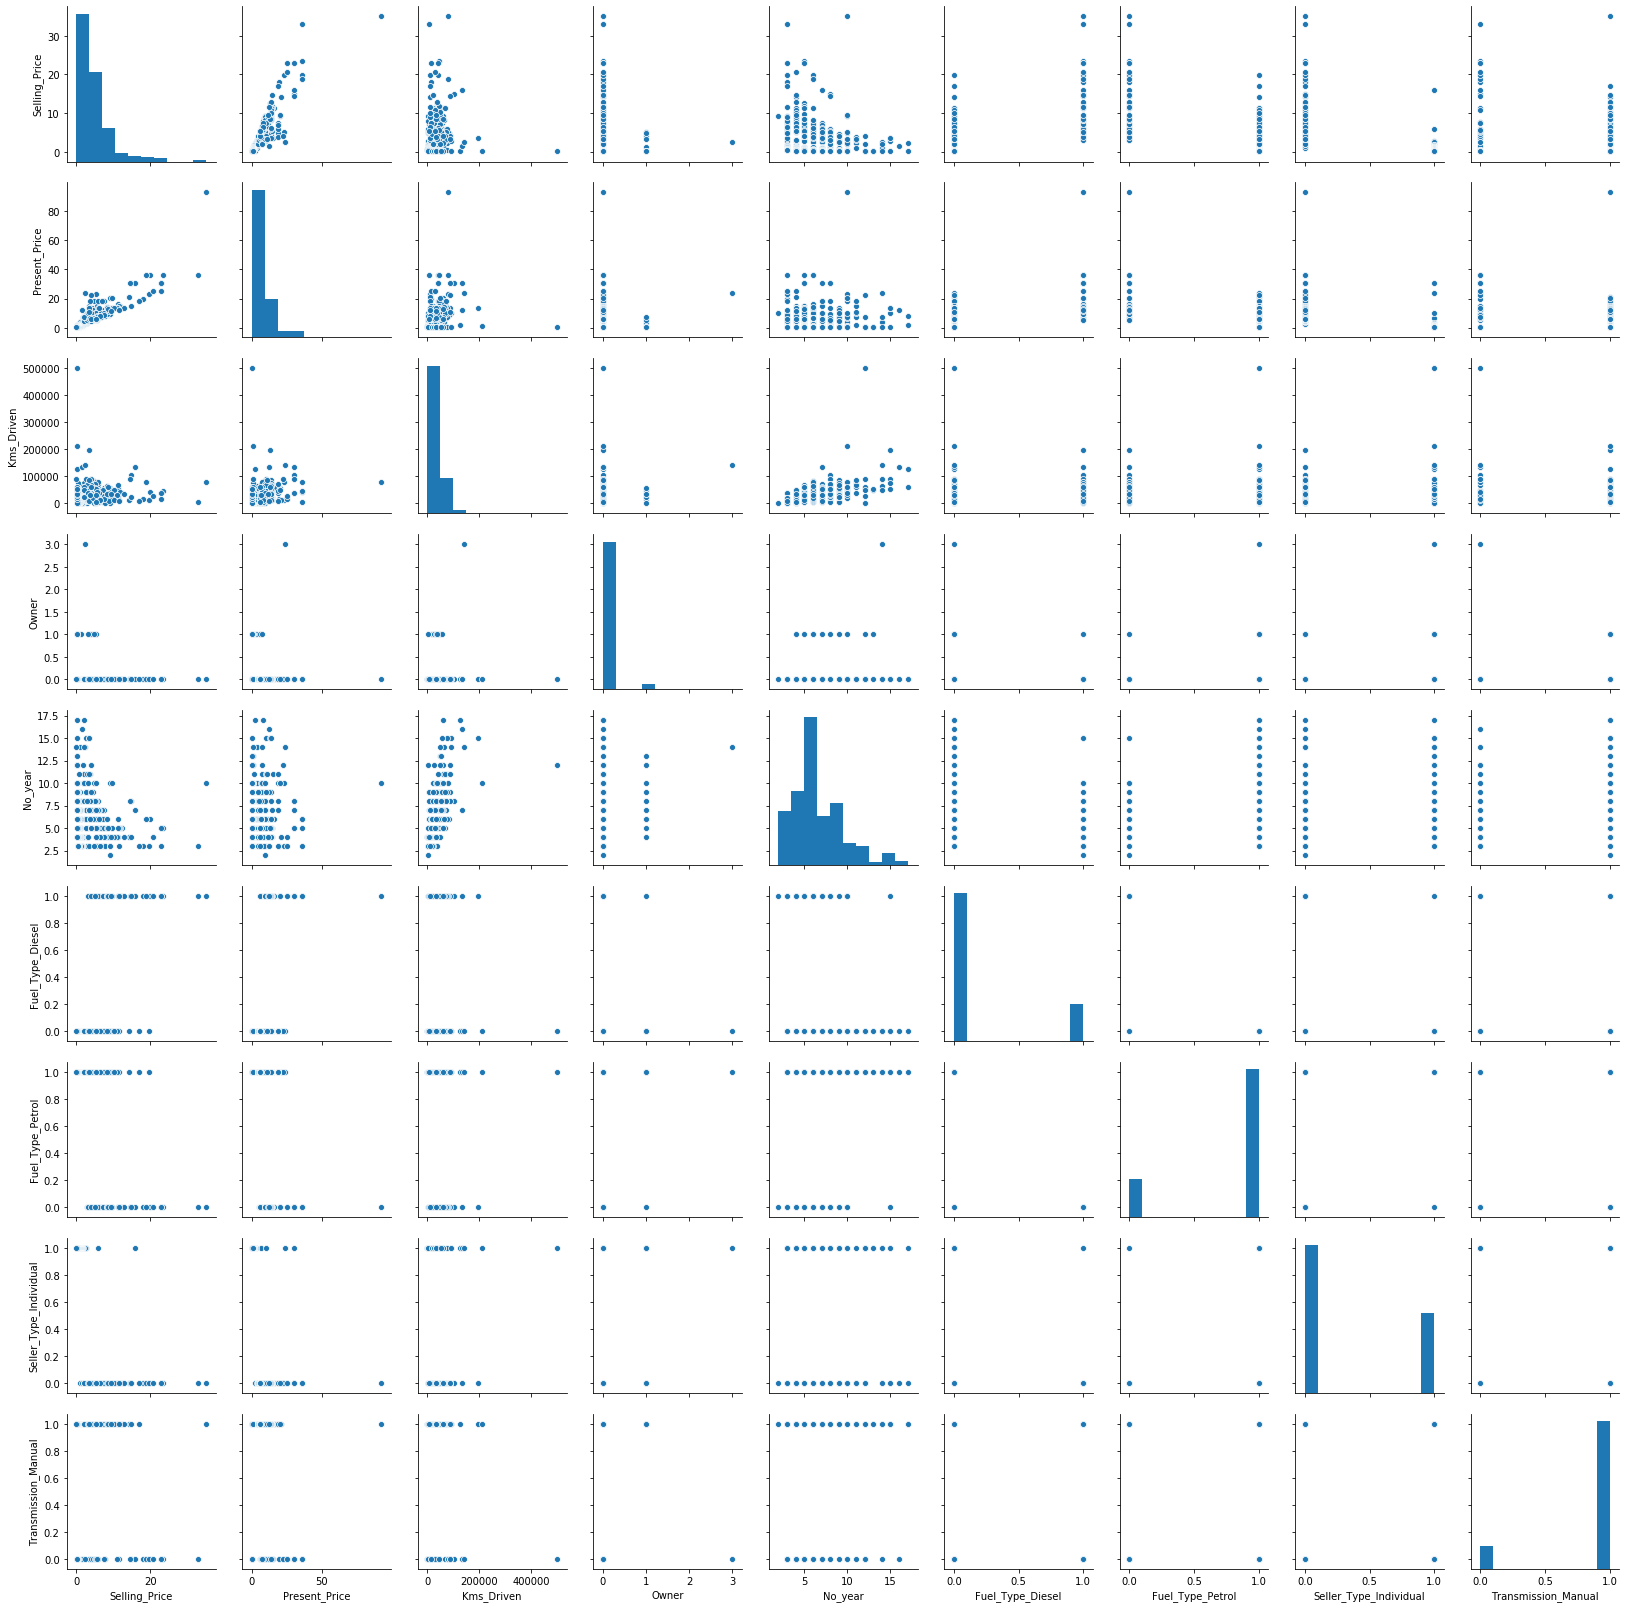

In [15]:
sns.pairplot(final_dataset)

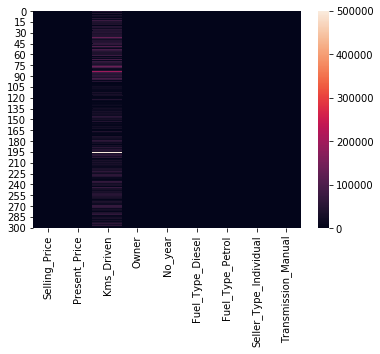

In [16]:
sns.heatmap(final_dataset)

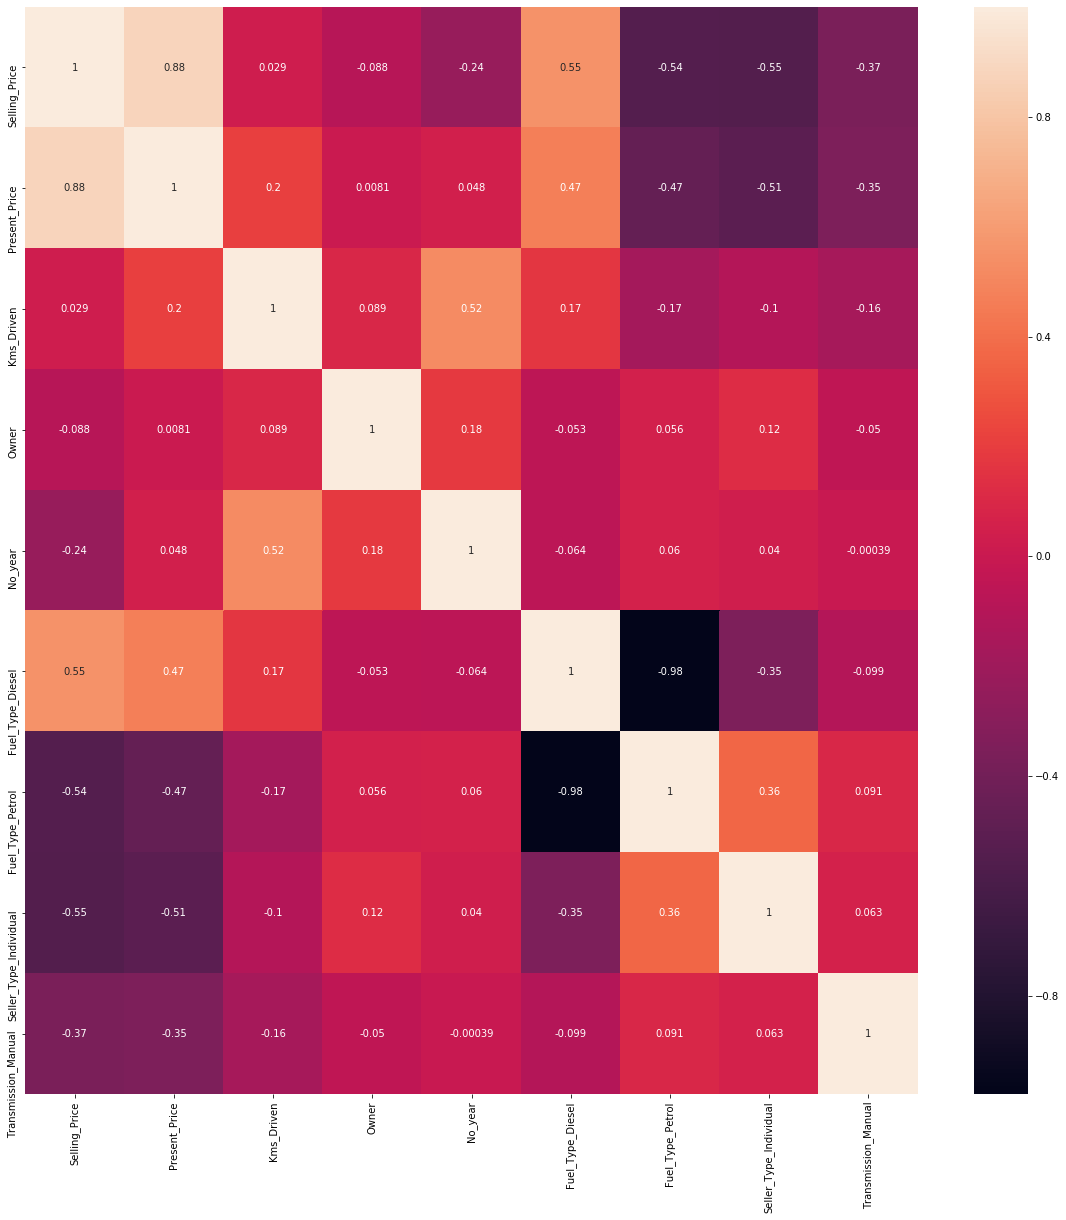

In [52]:
corrmat=final_dataset.corr()
top_corr_featurs=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_featurs].corr(), annot=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
## independent and dependent features
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [20]:
X.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [21]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

C:\Users\PYTHON\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [29]:
print(model.feature_importances_)

[0.39469194 0.04078917 0.00060692 0.08096773 0.21511419 0.03354347
 0.10315719 0.13112938]


In [111]:
print(f"testing Accuracy:  {model.score(X_test,y_test)}")
print(f"training Accuracy:  {model.score(X_train,y_train)}")


testing Accuracy:  1.0
training Accuracy:  1.0


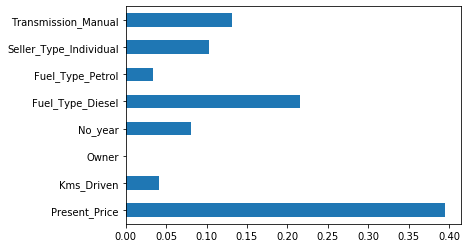

<Figure size 864x864 with 0 Axes>

In [35]:
## plotting grapgh of features importance for better visualization
feat_importance=pd.Series(model.feature_importances_, index=X.columns)
feat_importance.plot(kind="barh")
plt.figure(figsize=(12,12))
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [94]:
X_train.shape

(240, 8)

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [96]:
## Hyperparameter turning
n_estimators=[int(x)  for x in np.linspace(100, 1200, 12)]
max_features = ["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf= [1,2,5,10]

In [97]:
## creating a random grid

random_grid = {"n_estimators":n_estimators,
              "max_features":max_features,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [98]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error", n_iter=10,cv=10,verbose=2, random_state=42,n_jobs=1)


In [99]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler =StandardScaler()
X=scaler.fit_transform(X)

In [124]:
predictions=rf_random.predict(X_test)
predictions

array([ 4.54071,  3.7575 , 11.17076,  7.83301,  0.38997,  1.12448,
        6.33376,  0.5543 ,  0.51314,  0.78255,  3.07198,  4.05261,
        0.38219,  8.0959 ,  0.86061,  5.37135,  0.64931, 11.69347,
       11.22108,  1.22218,  0.43954,  0.94306,  4.50985,  0.43263,
        0.59973,  3.56665,  1.12061, 16.83454,  9.49326,  0.7548 ,
        1.00112,  9.15158,  0.4246 ,  7.64221,  7.30517,  0.39923,
        8.54874,  7.3054 ,  5.83244,  0.86885,  4.35325, 10.40953,
        0.52681,  4.15348,  7.37134,  4.4959 ,  0.3818 ,  8.20501,
        8.54874,  8.52373,  6.61855,  6.11638,  2.78725,  5.03338,
        0.68019,  0.37464,  5.18167, 21.20986,  3.14873,  3.65893,
        4.65175])

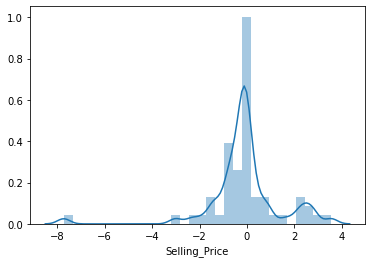

In [125]:
sns.distplot(y_test-predictions)

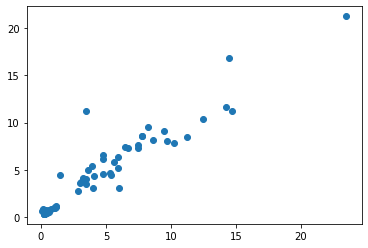

In [126]:
plt.scatter(y_test,predictions)

In [127]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [128]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [129]:
rf_random.best_score_

-3.868164458921267

## Building Another Model

In [130]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [131]:
final_dataset.isna().sum()

Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
No_year                   0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [132]:
X_,y_=final_dataset.drop("Selling_Price", axis=1), final_dataset.Selling_Price

In [134]:
X_.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [135]:
y_

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
5       9.25
6       6.75
7       6.50
8       8.75
9       7.45
10      2.85
11      6.85
12      7.50
13      6.10
14      2.25
15      7.75
16      7.25
17      7.75
18      3.25
19      2.65
20      2.85
21      4.90
22      4.40
23      2.50
24      2.90
25      3.00
26      4.15
27      6.00
28      1.95
29      7.45
       ...  
271     3.00
272     7.50
273     2.25
274     5.30
275    10.90
276     8.65
277     9.70
278     6.00
279     6.25
280     5.25
281     2.10
282     8.25
283     8.99
284     3.50
285     7.40
286     5.65
287     5.75
288     8.40
289    10.11
290     4.50
291     5.40
292     6.40
293     3.25
294     3.75
295     8.55
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [136]:
y_.value_counts()

0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
0.20     6
5.50     5
0.40     5
0.25     5
1.05     5
4.00     5
0.50     5
0.48     4
3.10     4
3.00     4
1.15     4
0.65     4
6.00     4
0.35     4
0.75     4
2.65     3
1.10     3
7.50     3
4.40     3
1.35     3
7.45     3
0.30     3
7.75     3
3.25     3
11.25    3
        ..
0.16     1
14.73    1
14.90    1
5.11     1
5.15     1
6.10     1
0.12     1
0.51     1
8.55     1
2.10     1
8.50     1
9.50     1
0.17     1
10.11    1
11.50    1
9.65     1
4.85     1
3.45     1
0.31     1
12.90    1
0.95     1
6.15     1
1.65     1
3.80     1
1.11     1
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X__train,X__test,y__train,y__test=train_test_split(X_,y_)

In [141]:
lin_model = LinearRegression()
lin_model.fit(X__train,y__train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
print(f"Testing Accuracy: {lin_model.score(X__test,y__test)} " )
print(f"Training Accuracy: {lin_model.score(X__train,y__train)} " )

Testing Accuracy: 0.839911940464871 
Training Accuracy: 0.889745384262212 


## saving the Linear model

In [148]:
import pickle
file = open("lin_model_car.pk1", "wb")

pickle.dump(lin_model, file)